# Life Expectancy EDA & Visualization

## Problem Defination: 

Life Expectancy is one of the crucial parameter of the well being of a country and how well its functioning. Also, Life expectancy is mostly derived based on different factors but not limited to Nourishment, CO2 emission, Employment, Saniatation. Also, How much the country is spending on healthcare Education reflects the overall well being of its citizen. Which inturn effect the life expectancy.Based on the World Bank data. Analysis can be performed to understand the patterns and project or predict the life expectancy of the countries.

This can be helful in several ways, Such as:
1. Average age of the country
2. How mining is effecting the environment.
3. How healthly the people of a country are.
4. What possible measures can be take to improve the current situations, etc.. 

## Objective: ##

The key objective of this analysis is to explore the data and perform some EDA and Visualize to the patterns.

## Introductory Remarks ##

*The dataset provided is from year 2001 to 2019. 
The dataset consists of details of different countries and life expectancy.*


In [96]:
# Import the libraries
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import missingno as msno


In [5]:
df = pd.read_csv('life_expectancy.csv',header=0, index_col=False, encoding= 'unicode_escape')

In [15]:
#Display top 5 records
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


# 1. Data Exploration

## 1.1. Load & Display the data

In [18]:
df.sample(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
535,Belgium,BEL,Europe & Central Asia,High income,2004,78.878049,2.5,114019.996643,9.367215,NaN,7.360,NaN,74.726107,392992.59,162823.93,2692531.59
2068,Togo,TGO,Sub-Saharan Africa,Low income,2012,58.661000,19.4,2240.000010,4.807866,4.71920,2.034,2.5,7.742056,230228.19,2624143.03,1011255.29
1478,Lebanon,LBN,Middle East & North Africa,Lower middle income,2009,78.161000,7.6,21899.999619,7.007375,1.76571,6.350,NaN,12.379134,95632.78,136313.07,908391.10
1618,Fiji,FJI,East Asia & Pacific,Upper middle income,2010,66.655000,5.6,1159.999967,3.416641,4.82436,4.310,NaN,NaN,25208.96,55285.37,227552.88
2158,Hungary,HUN,Europe & Central Asia,High income,2013,75.565854,2.5,40759.998322,7.248978,4.18773,10.180,NaN,80.914330,352549.20,121498.58,3242293.04


In [14]:
df.shape

(3306, 16)

## 1.2. Data Inspection

### 1.2.1. Data Profiling

In [21]:
# generate the overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [22]:
df.describe(include='all')

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306,3306,3306,3306,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
unique,174,174,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19,19,893,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,NaN,NaN,NaN,NaN,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,NaN,NaN,NaN,NaN,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,NaN,NaN,NaN,NaN,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,NaN,NaN,NaN,NaN,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,NaN,NaN,NaN,NaN,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06


In [23]:
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [25]:
df['Country Name'].nunique()

174

**Data Overview**:
- There are 3 thousand and 3 hunderad records of data that consist of 16 features.
- It seems the data containing missing values in some features such as (Prevelance of Undernourishment, 
                                                                        Education Expenditure %,
                                                                       Corruption,
                                                                       Sanitation)
- Year needs to convert to date format
- Some of the labels needs to be renamed as it has spaces and symbols in it.
- The upper case letters will be converted to the lower case letter, so that it's easy to do querying or filtering
- Certain features will be selected for the further analysis: 'Country Name', 'Region', 'IncomeGroup', 
                                                     'Year','Life Expectancy World Bank', 
                                                     'Prevelance of Undernourishment', 'CO2', 
                                                     'Health Expenditure %', 'Education Expenditure %', 
                                                     'Unemployment','Sanitation',
                                                     'Injuries', 'Communicable','NonCommunicable'
- There are 174 unique countries in the dataset. It seems that Corruption has the most missing values. Corruption values has to be handled based on repeated values.

## 2. Data Cleaning

### 2.1. Data Type Conversion

In [6]:
# Convert blank values in all columns into NaN values
'''
Since when the inspection was found that some columns
contain blank values. So they are needed to be filled
with NaN values
'''
df=df.mask(df == '')

In [9]:
# after masking
df.sample(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable,year_dt
1075,Chile,CHL,Latin America & Caribbean,High income,2007,78.09900,3.1,6.457000e+04,6.175375,3.21379,8.430,NaN,57.984299,516372.75,297566.44,3069732.77,1970
2380,Norway,NOR,Europe & Central Asia,High income,2014,82.10000,2.5,3.911000e+04,9.344934,7.69504,3.480,NaN,63.305572,121011.77,57783.78,1123550.65,1970
1192,Suriname,SUR,Latin America & Caribbean,Upper middle income,2007,69.57900,8.8,1.410000e+03,5.590702,NaN,9.032,NaN,29.498344,23621.91,43093.17,106069.06,1970
1461,Haiti,HTI,Latin America & Caribbean,Lower middle income,2009,60.14800,45.8,1.990000e+03,3.604476,NaN,15.657,2.5,NaN,642367.35,2714446.99,2377998.64,1970
1820,Japan,JPN,East Asia & Pacific,High income,2011,82.59122,2.5,1.213520e+06,10.487802,3.60528,4.550,NaN,77.779694,3858529.87,2033074.43,30473949.56,1970


### 2.2. Irrelevant Data

The irrelevant data for further analysist will be excluded.

In [11]:
# Manually select the features that related for churn analysis
selected_df = df[['Country Name', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable']]
selected_df = selected_df.copy()

In [13]:
selected_df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable,year_dt
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03,3306.0
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06,1970.0
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07,0.0
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03,1970.0
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05,1970.0
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06,1970.0
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06,1970.0
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08,1970.0


In [14]:
selected_df.shape

(3306, 16)

### 2.3. Standardize

In [17]:
cols = selected_df.columns

In [19]:
'''
Lowercase all column values with object data type
to ease the analysist
'''

selected_df.columns = selected_df.columns.str.lower()


In [49]:
# Verification
selected_df.head(1)

,country name,region,incomegroup,year,life expectancy world bank,prevelance of undernourishment,co2,health expenditure %,education expenditure %,unemployment,corruption,sanitation,injuries,communicable,noncommunicable,year_dt
0,Afghanistan,South_Asia,Low_income,2001,56.308,47.8,730.0,NaN,NaN,10.809,NaN,NaN,2179727.1,9689193.7,5795426.38,1970


In [57]:
'''
Replace all column names which contain spaces with underscore
to ease the analysist
'''
cols = selected_df.columns.str.replace(" ", "_")



In [58]:
selected_df.columns = cols

In [62]:
selected_df.rename(columns={'health_expenditure_%':'health_expenditure_per', 'education_expenditure_%':'education_expenditure_per'},inplace=True)

In [103]:
selected_df.head(1)

,country_name,region,incomegroup,year,life_expectancy_world_bank,prevelance_of_undernourishment,co2,health_expenditure_per,education_expenditure_per,unemployment,corruption,sanitation,injuries,communicable,noncommunicable,year_dt
0,Afghanistan,South_Asia,Low_income,2001,56.31,47.8,730.0,NaN,NaN,10.81,NaN,NaN,2179727.1,9689193.7,5795426.38,2001


In [84]:
selected_df['year_dt'] = pd.to_datetime(selected_df['year'], format = "%Y").dt.strftime('%Y') 

In [102]:
selected_df[['life_expectancy_world_bank','unemployment']] = selected_df[['life_expectancy_world_bank','unemployment']].round(2)

In [86]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_name                    3306 non-null   object 
 1   region                          3306 non-null   object 
 2   incomegroup                     3306 non-null   object 
 3   year                            3306 non-null   int64  
 4   life_expectancy_world_bank      3118 non-null   float64
 5   prevelance_of_undernourishment  2622 non-null   float64
 6   co2                             3154 non-null   float64
 7   health_expenditure_per          3126 non-null   float64
 8   education_expenditure_per       2216 non-null   float64
 9   unemployment                    3002 non-null   float64
 10  corruption                      975 non-null    float64
 11  sanitation                      2059 non-null   float64
 12  injuries                        33

In [88]:
# How many duplicated data?
selected_df.duplicated().sum()

0

### 2.4. Missing Data

In [91]:
# Check the missing value
selected_df.isna().sum().sort_values(ascending=False)

corruption                        2331
sanitation                        1247
education_expenditure_per         1090
prevelance_of_undernourishment     684
unemployment                       304
life_expectancy_world_bank         188
health_expenditure_per             180
co2                                152
country_name                         0
region                               0
incomegroup                          0
year                                 0
injuries                             0
communicable                         0
noncommunicable                      0
year_dt                              0
dtype: int64

In [90]:
# Calculate the percentage of null values in each column
null_percentage = selected_df.isnull().sum().sort_values(ascending=False) / len(selected_df) * 100

# Display the percentage of null values
print(round(null_percentage,2))

corruption                        70.51
sanitation                        37.72
education_expenditure_per         32.97
prevelance_of_undernourishment    20.69
unemployment                       9.20
life_expectancy_world_bank         5.69
health_expenditure_per             5.44
co2                                4.60
country_name                       0.00
region                             0.00
incomegroup                        0.00
year                               0.00
injuries                           0.00
communicable                       0.00
noncommunicable                    0.00
year_dt                            0.00
dtype: float64


<AxesSubplot:>

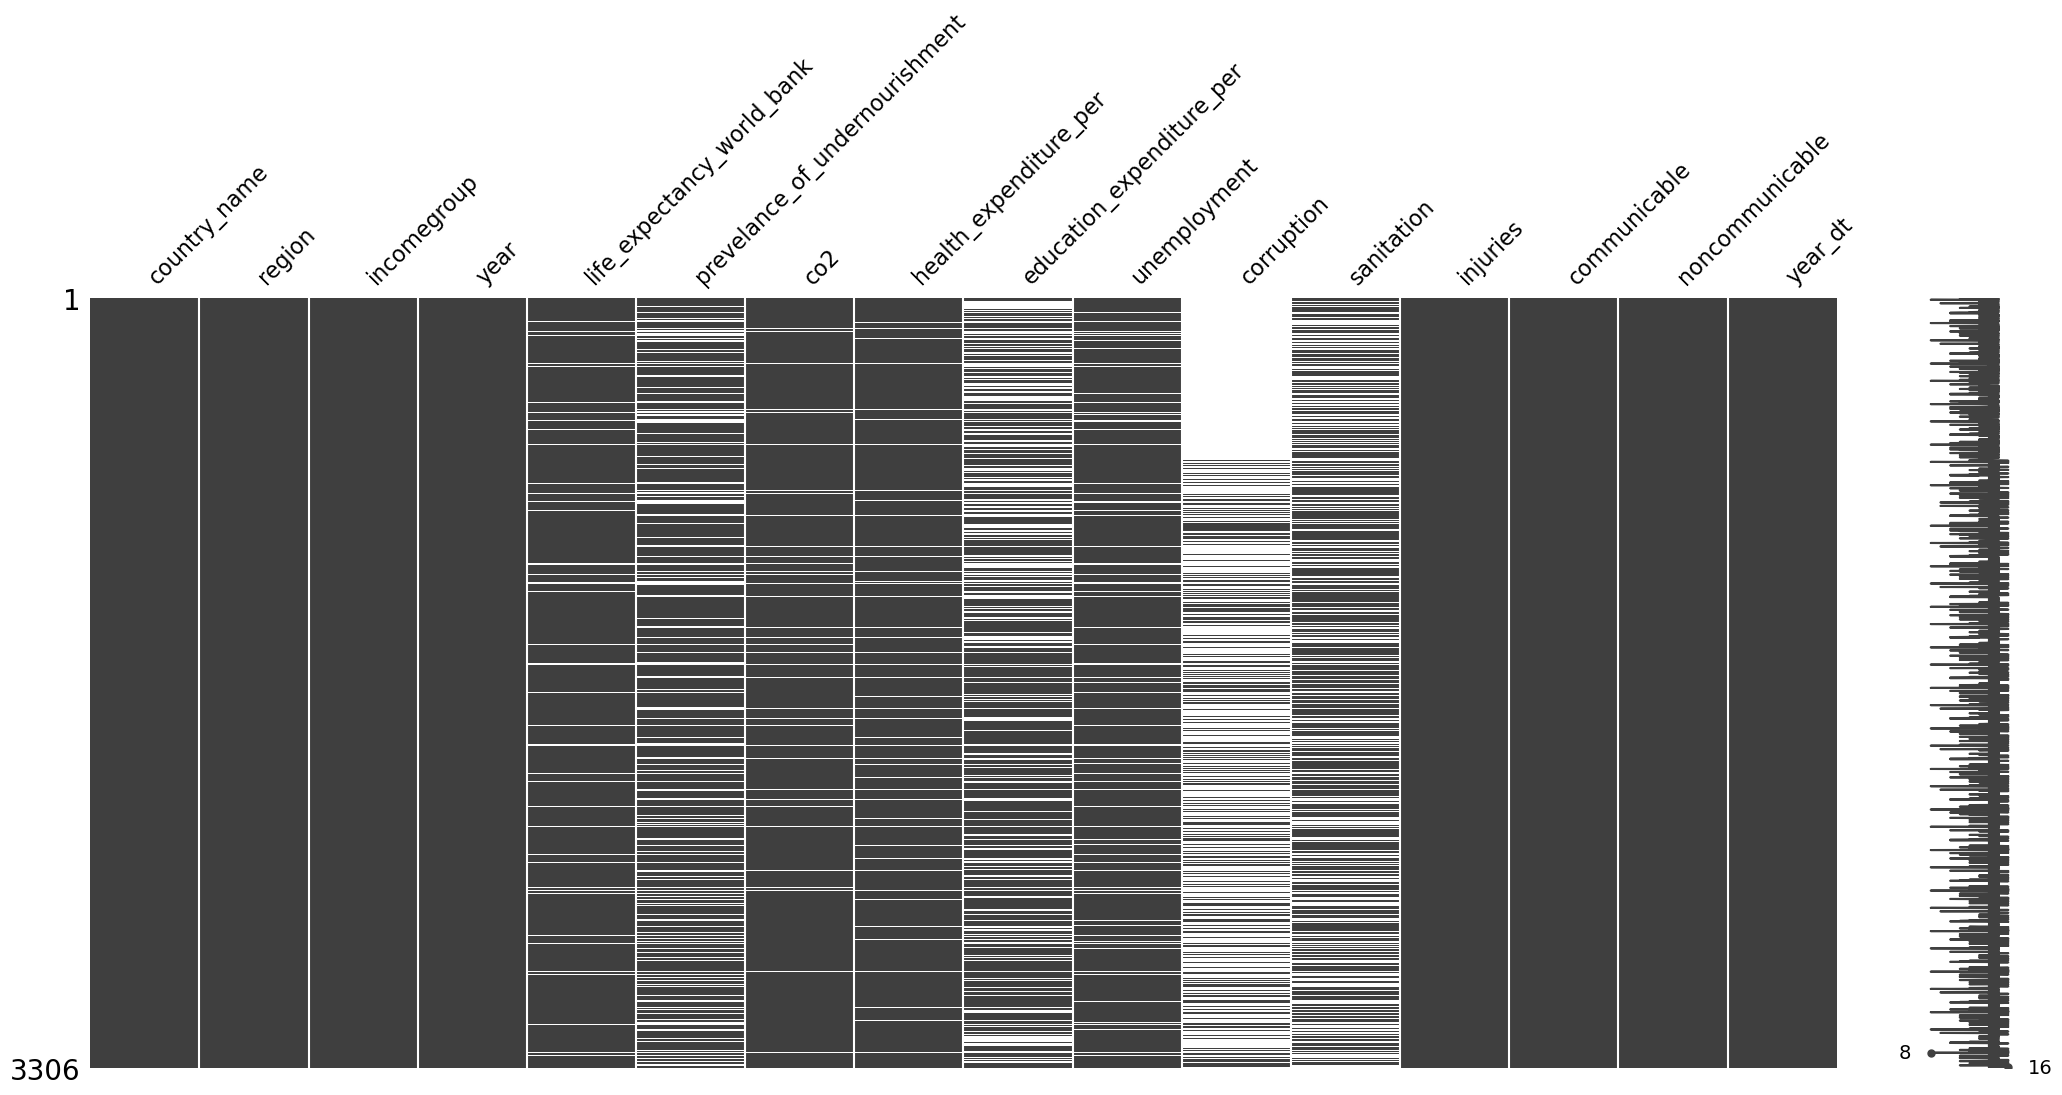

In [99]:
# Using matrix visualization to check missing values
msno.matrix(selected_df)

#The white lines in this matrix represent the missing values of our dataset.

<AxesSubplot:>

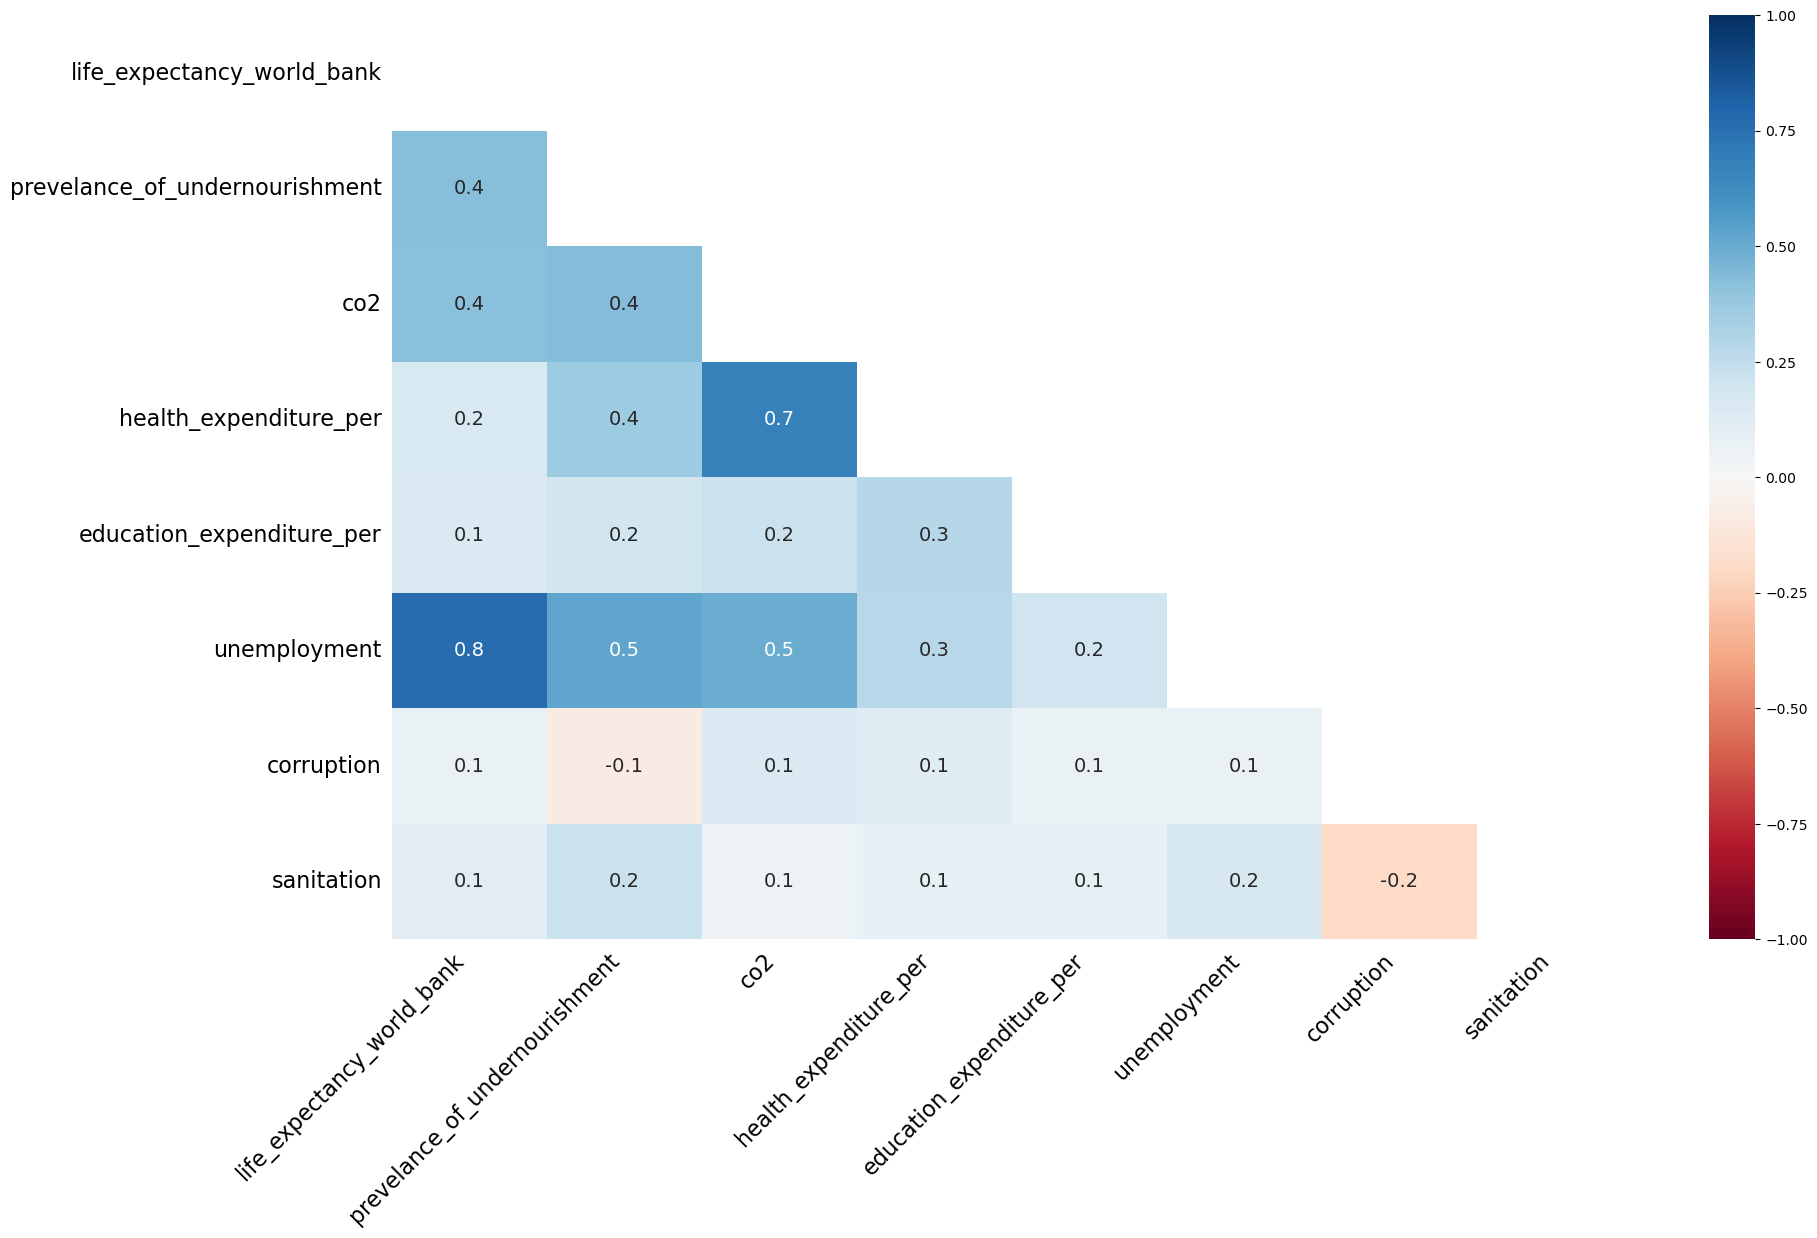

In [100]:
msno.heatmap(selected_df)

The heatmap shows how the presence or absence of a value of a feature affects the presence or absence of another feature. 

#### Handling Missing Values 

- Almost 70% values in corruption column are missing. So its better to drop the column rather than handling the missing values.
- Sanitation and Education Expenditure has more than 30% missing values. Missing values can be handled by taking mediam value.
- 10% of Unemployment & 20% missing values of prevelance_of_undernourishment can also be handled as previously mentioned columns.
- life_expectancy, health_expenditure_per, co2 has upto 5% missing values. It will be safe to drop those missing values.

In [105]:
df_preprocess = selected_df.copy()

##### a. Drop Feature

In [110]:
df_preprocess.drop(columns=['corruption'], inplace=True)

##### b. Drop Null Values

In [107]:
df_preprocess.dropna(subset=['life_expectancy_world_bank', 'health_expenditure_per', 'co2'],inplace=True)

In [156]:
df_preprocess.head(1)

,country_name,region,incomegroup,year,life_expectancy_world_bank,prevelance_of_undernourishment,co2,health_expenditure_per,education_expenditure_per,unemployment,sanitation,injuries,communicable,noncommunicable,year_dt
1,Angola,Sub-Saharan_Africa,Lower_middle_income,2001,47.06,67.5,15960.0,4.483516,NaN,4.0,NaN,1392080.71,11190210.53,2663516.34,2001


In [118]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2976 entries, 1 to 3305
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_name                    2976 non-null   object 
 1   region                          2976 non-null   object 
 2   incomegroup                     2976 non-null   object 
 3   year                            2976 non-null   int64  
 4   life_expectancy_world_bank      2976 non-null   float64
 5   prevelance_of_undernourishment  2571 non-null   float64
 6   co2                             2976 non-null   float64
 7   health_expenditure_per          2976 non-null   float64
 8   education_expenditure_per       2125 non-null   float64
 9   unemployment                    2898 non-null   float64
 10  sanitation                      1902 non-null   float64
 11  injuries                        2976 non-null   float64
 12  communicable                    29

In [182]:
df_preprocess_2 = df_preprocess.copy()

##### Imputing Missing Data

- Missing values cannot be handled for each country since the values were missing for that country. So region and incomegroup were the next option to computer the missing values.

In [183]:
df_preprocess_2['sanitation'] = df_preprocess_2.groupby(['region','incomegroup'])['sanitation'].transform(lambda x: x.fillna(x.median()))

In [186]:
df_preprocess_2['sanitation'].isna().sum()

170

In [187]:
df_preprocess_2['prevelance_of_undernourishment'] = df_preprocess_2.groupby(['region','incomegroup'])['prevelance_of_undernourishment'].transform(lambda x: x.fillna(x.median()))

In [188]:
print(df_preprocess['prevelance_of_undernourishment'].isna().sum())
print(df_preprocess_2['prevelance_of_undernourishment'].isna().sum())

405
38


In [190]:
df_preprocess_2['unemployment'] = df_preprocess_2.groupby(['region','incomegroup'])['unemployment'].transform(lambda x: x.fillna(x.median()))

In [191]:
print(df_preprocess['unemployment'].isna().sum())
print(df_preprocess_2['unemployment'].isna().sum())

78
19


In [184]:
df_preprocess_2['education_expenditure_per'] = df_preprocess_2.groupby('country_name')['education_expenditure_per'].transform(lambda x: x.fillna(x.median()))

In [185]:
print(df_preprocess['education_expenditure_per'].isna().sum())
print(df_preprocess_2['education_expenditure_per'].isna().sum())

851
82


In [192]:
df_preprocess_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2976 entries, 1 to 3305
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_name                    2976 non-null   object 
 1   region                          2976 non-null   object 
 2   incomegroup                     2976 non-null   object 
 3   year                            2976 non-null   int64  
 4   life_expectancy_world_bank      2976 non-null   float64
 5   prevelance_of_undernourishment  2938 non-null   float64
 6   co2                             2976 non-null   float64
 7   health_expenditure_per          2976 non-null   float64
 8   education_expenditure_per       2894 non-null   float64
 9   unemployment                    2957 non-null   float64
 10  sanitation                      2806 non-null   float64
 11  injuries                        2976 non-null   float64
 12  communicable                    29

In [193]:
# Calculate the percentage of null values in each column
null_percentage = selected_df.isnull().sum().sort_values(ascending=False) / len(selected_df) * 100

# Display the percentage of null values
print(round(null_percentage,2))

corruption                        70.51
sanitation                        37.72
education_expenditure_per         32.97
prevelance_of_undernourishment    20.69
unemployment                       9.20
life_expectancy_world_bank         5.69
health_expenditure_per             5.44
co2                                4.60
country_name                       0.00
region                             0.00
incomegroup                        0.00
year                               0.00
injuries                           0.00
communicable                       0.00
noncommunicable                    0.00
year_dt                            0.00
dtype: float64


In [200]:
# Calculate the percentage of null values in each column
null_percentage = df_preprocess_2.isnull().sum().sort_values(ascending=False) / len(df_preprocess_2) * 100 

# Display the percentage of null values
print(round(null_percentage,2) )

sanitation                        5.71
education_expenditure_per         2.76
prevelance_of_undernourishment    1.28
unemployment                      0.64
country_name                      0.00
region                            0.00
incomegroup                       0.00
year                              0.00
life_expectancy_world_bank        0.00
co2                               0.00
health_expenditure_per            0.00
injuries                          0.00
communicable                      0.00
noncommunicable                   0.00
year_dt                           0.00
dtype: float64


In [201]:
df_preprocess_2.dropna(subset=['sanitation', 'education_expenditure_per', 'prevelance_of_undernourishment'],inplace=True)

In [202]:
# Calculate the percentage of null values in each column
null_percentage = df_preprocess_2.isnull().sum().sort_values(ascending=False) / len(df_preprocess_2) * 100 

# Display the percentage of null values
print(round(null_percentage,2) )

country_name                      0.0
region                            0.0
incomegroup                       0.0
year                              0.0
life_expectancy_world_bank        0.0
prevelance_of_undernourishment    0.0
co2                               0.0
health_expenditure_per            0.0
education_expenditure_per         0.0
unemployment                      0.0
sanitation                        0.0
injuries                          0.0
communicable                      0.0
noncommunicable                   0.0
year_dt                           0.0
dtype: float64


In [203]:
df_preprocess_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2743 entries, 1 to 3305
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_name                    2743 non-null   object 
 1   region                          2743 non-null   object 
 2   incomegroup                     2743 non-null   object 
 3   year                            2743 non-null   int64  
 4   life_expectancy_world_bank      2743 non-null   float64
 5   prevelance_of_undernourishment  2743 non-null   float64
 6   co2                             2743 non-null   float64
 7   health_expenditure_per          2743 non-null   float64
 8   education_expenditure_per       2743 non-null   float64
 9   unemployment                    2743 non-null   float64
 10  sanitation                      2743 non-null   float64
 11  injuries                        2743 non-null   float64
 12  communicable                    27

In [208]:
df_preprocess_2[['health_expenditure_per','sanitation','education_expenditure_per']] = df_preprocess_2[['health_expenditure_per','sanitation','education_expenditure_per']].round(2)

In [209]:
df_preprocess_2.head()

,country_name,region,incomegroup,year,life_expectancy_world_bank,prevelance_of_undernourishment,co2,health_expenditure_per,education_expenditure_per,unemployment,sanitation,injuries,communicable,noncommunicable,year_dt
1,Angola,Sub-Saharan_Africa,Lower_middle_income,2001,47.06,67.5,15960.0,4.48,2.92,4.00,21.30,1392080.71,11190210.53,2663516.34,2001
2,Albania,Europe_&_Central_Asia,Upper_middle_income,2001,74.29,4.9,3230.0,7.14,3.46,18.58,40.52,117081.67,140894.78,532324.75,2001
4,United_Arab_Emirates,Middle_East_&_North_Africa,High_income,2001,74.54,2.8,97200.0,2.48,3.87,2.49,86.51,144678.14,65271.91,481740.70,2001
5,Argentina,Latin_America_&_Caribbean,Upper_middle_income,2001,73.76,3.0,125260.0,8.37,4.83,17.32,48.05,1397676.07,1507068.98,8070909.52,2001
6,Armenia,Europe_&_Central_Asia,Upper_middle_income,2001,71.80,26.1,3600.0,4.65,2.47,10.91,46.35,103371.75,122238.13,767916.19,2001


In [215]:
df_preprocess_2.columns

Index(['country_name', 'region', 'incomegroup', 'year',
       'life_expectancy_world_bank', 'prevelance_of_undernourishment', 'co2',
       'health_expenditure_per', 'education_expenditure_per', 'unemployment',
       'sanitation', 'injuries', 'communicable', 'noncommunicable', 'year_dt'],
      dtype='object')

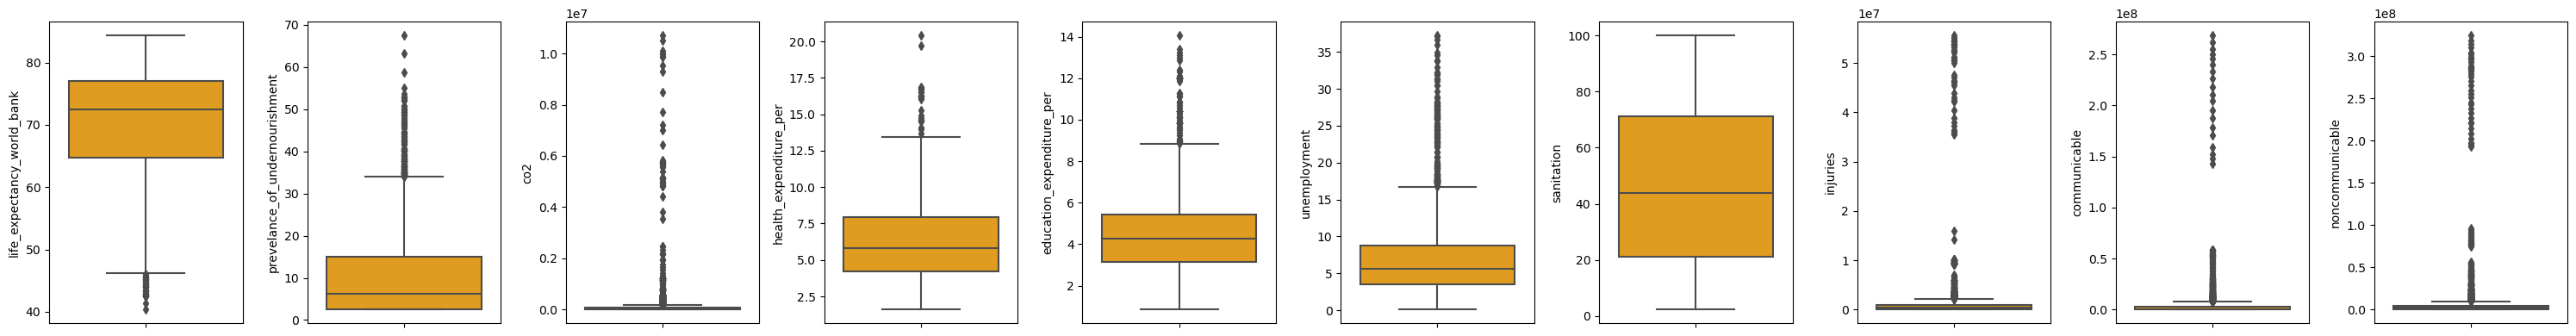

In [227]:
# Identify using boxplot
plt.figure(figsize=(30,4))  
cols = ['life_expectancy_world_bank', 'prevelance_of_undernourishment', 'co2',
       'health_expenditure_per', 'education_expenditure_per', 'unemployment',
       'sanitation', 'injuries', 'communicable', 'noncommunicable']
for i in range(0,len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=df_preprocess_2[cols[i]], color='orange')
    plt.tight_layout();

In [230]:
def outlier_count(col, data=df_preprocess_2):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [231]:
for col in cols:
    outlier_count(col)

---------------life_expectancy_world_bank---------------
Number of outliers: 36
Percent of data that is outlier: 1.31%
---------------prevelance_of_undernourishment---------------
Number of outliers: 117
Percent of data that is outlier: 4.27%
---------------co2---------------
Number of outliers: 419
Percent of data that is outlier: 15.28%
---------------health_expenditure_per---------------
Number of outliers: 23
Percent of data that is outlier: 0.84%
---------------education_expenditure_per---------------
Number of outliers: 67
Percent of data that is outlier: 2.44%
---------------unemployment---------------
Number of outliers: 161
Percent of data that is outlier: 5.87%
---------------sanitation---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------injuries---------------
Number of outliers: 309
Percent of data that is outlier: 11.27%
---------------communicable---------------
Number of outliers: 401
Percent of data that is outlier: 14.62%
---------

## 3. Exploratory Data Analysis

In [233]:
df_eda = df_preprocess_2.copy()

In [264]:
df_eda.describe()


,year,life_expectancy_world_bank,prevelance_of_undernourishment,co2,health_expenditure_per,education_expenditure_per,unemployment,sanitation,injuries,communicable,noncommunicable
count,2743.000000,2743.000000,2743.000000,2.743000e+03,2743.000000,2743.000000,2743.000000,2743.000000,2.743000e+03,2.743000e+03,2.743000e+03
mean,2010.019322,70.249519,10.734306,1.767533e+05,6.209683,4.475545,7.020638,47.440456,1.492377e+06,4.662142e+06,8.545699e+06
std,5.473162,9.144962,10.601356,8.261322e+05,2.531992,1.860747,5.530024,28.186918,5.683794e+06,1.865196e+07,3.199195e+07
min,2001.000000,40.370000,2.500000,3.000000e+01,1.600000,0.850000,0.100000,2.380000,2.058230e+03,2.388770e+03,1.428969e+04
25%,2005.000000,64.675000,2.500000,2.625000e+03,4.190000,3.150000,3.510000,21.300000,1.065538e+05,8.346287e+04,6.254022e+05
50%,2010.000000,72.450000,6.300000,1.448000e+04,5.830000,4.260000,5.610000,43.990000,3.284737e+05,5.311367e+05,1.839950e+06
75%,2015.000000,77.035000,15.100000,6.626500e+04,7.950000,5.445000,8.810000,71.100000,9.061340e+05,3.148210e+06,4.379550e+06
max,2019.000000,84.360000,67.500000,1.070722e+07,20.410000,14.060000,37.250000,100.000000,5.563676e+07,2.685646e+08,3.246378e+08


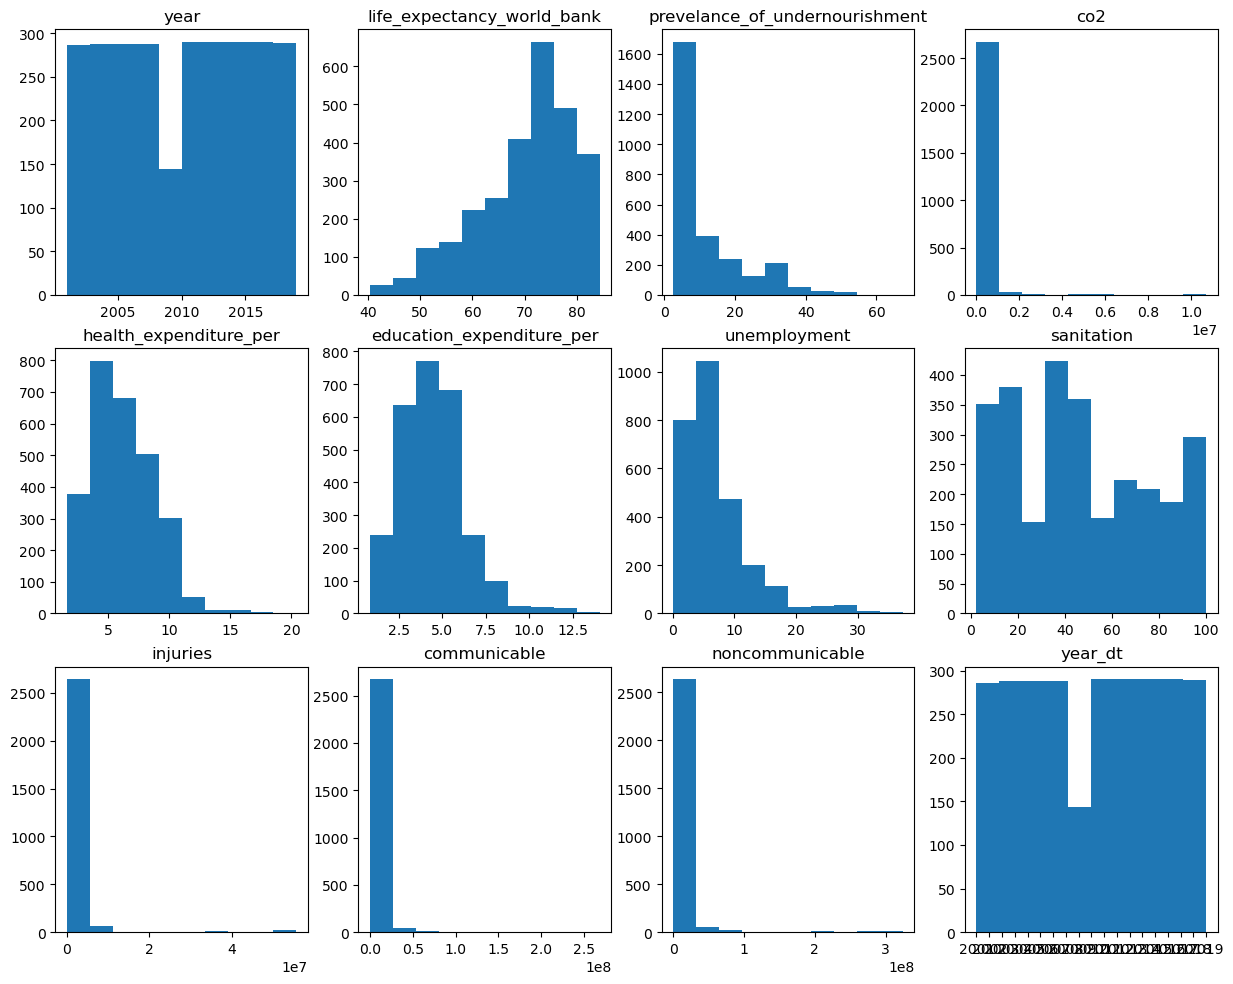

In [235]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(df_eda[col])
    plt.title(col)

In [273]:
cols = ['life_expectancy_world_bank', 'prevelance_of_undernourishment', 'co2',
       'health_expenditure_per', 'education_expenditure_per', 'unemployment',
       'sanitation', 'injuries', 'communicable', 'noncommunicable']

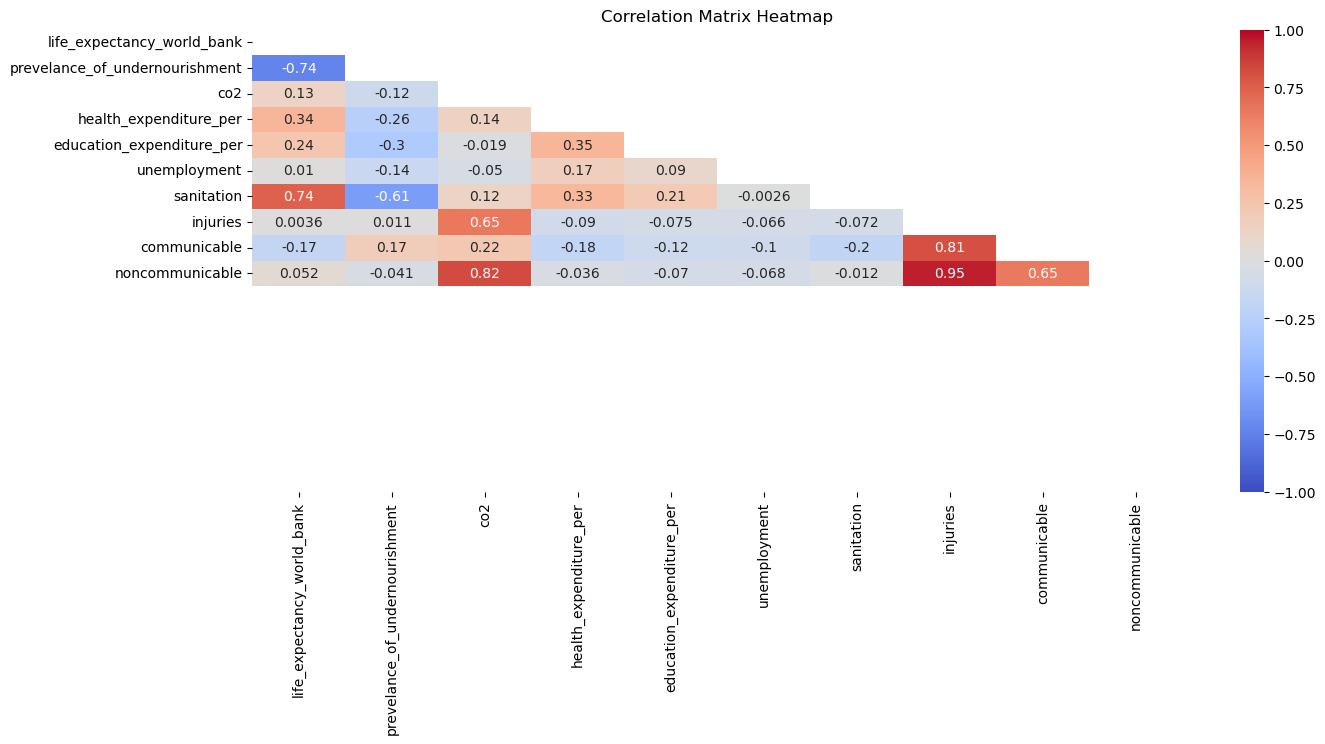

In [266]:
mask = np.triu(df_eda[cols].corr())
plt.figure(figsize=(15,6))
sns.heatmap(df_eda[cols].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

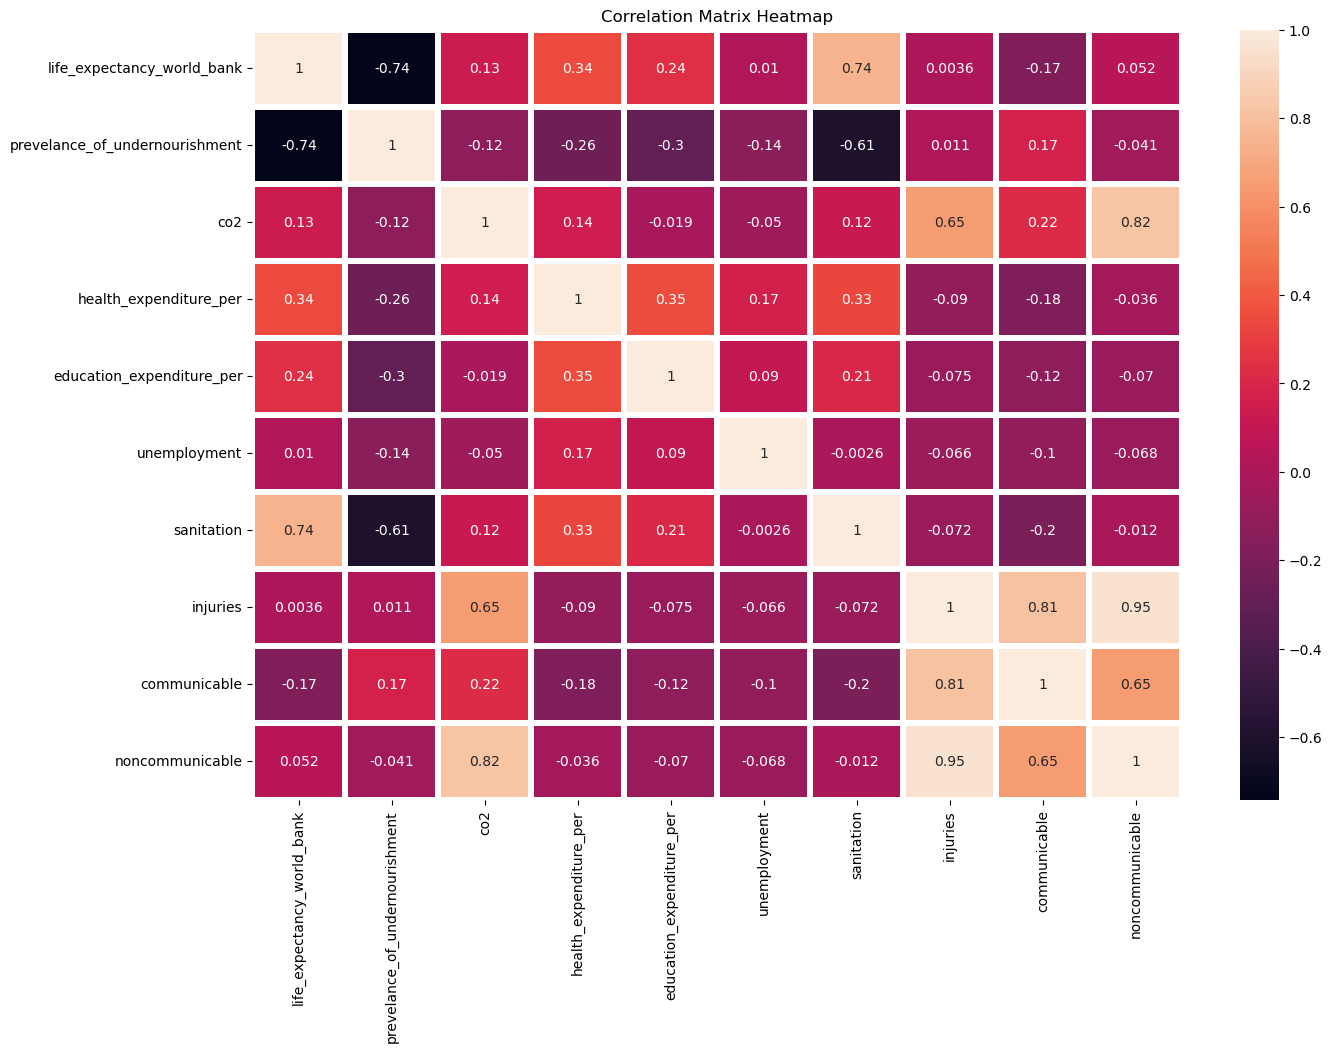

In [271]:
cols = df_eda[cols]
plt.figure(figsize=(15,10))
sns.heatmap(cols.corr(), annot =True, linewidths = 4)
plt.title('Correlation Matrix Heatmap')
plt.show()


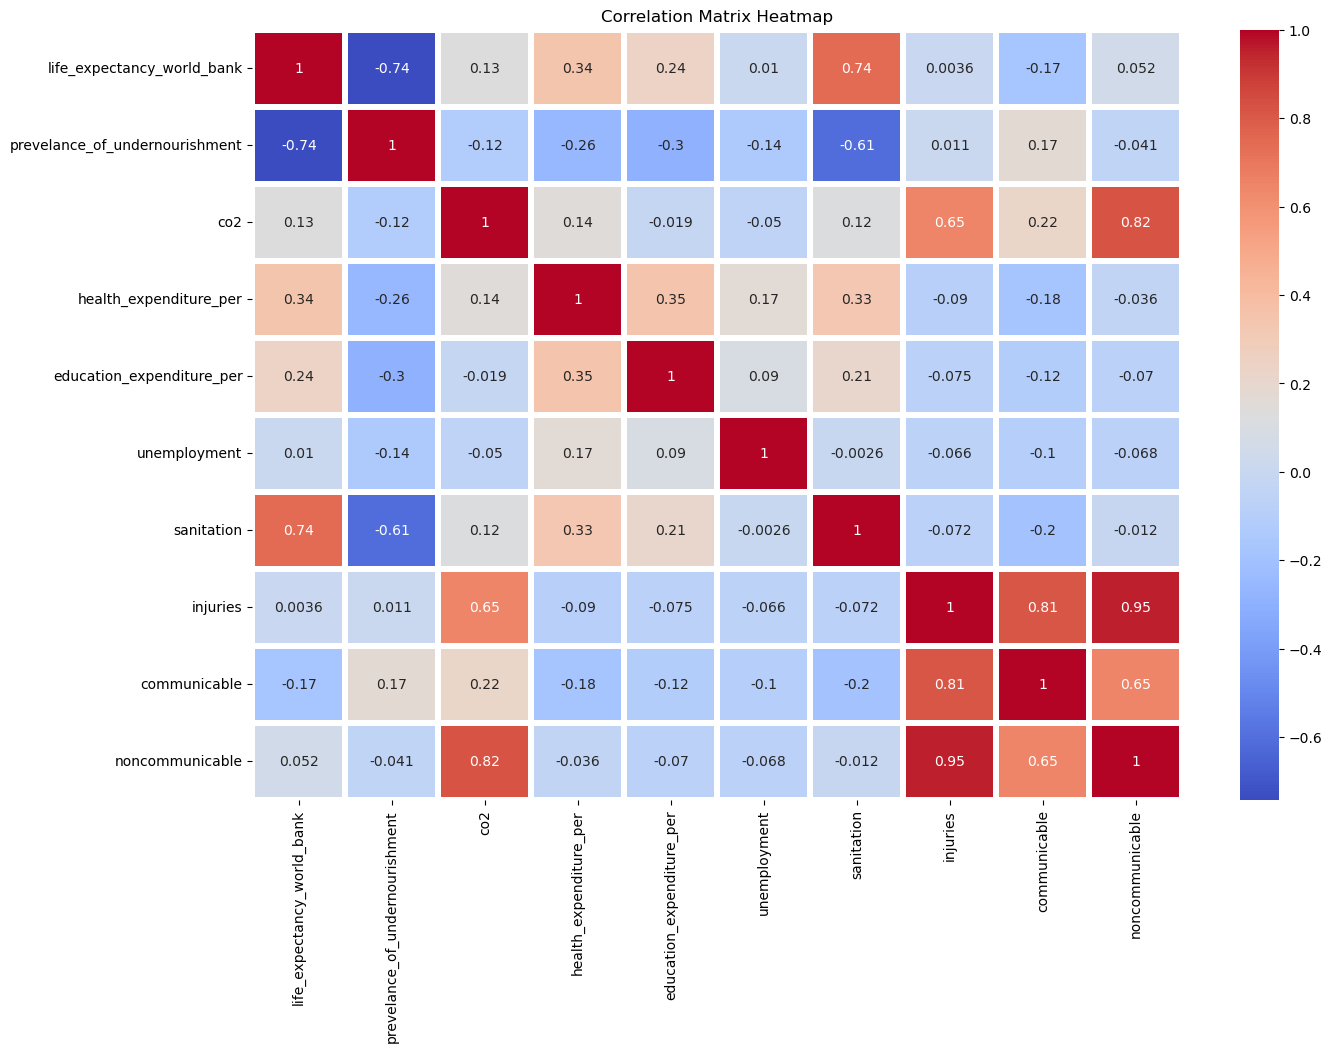

In [274]:
cols = df_eda[cols]
plt.figure(figsize=(15,10))
sns.heatmap(cols.corr(), annot =True,cmap='coolwarm', linewidths = 4)
plt.title('Correlation Matrix Heatmap')
plt.show()


* After Visualizing the above correlations using heatmap. Few assuptions can be derived. Such as:
    - Sanitation has a very strong effect on Life Expectancy of the people.
    - Similarly, CO2 Emission & Education Expenditure seem to effect the Life Expectancy of the people.
    - Where as Prevelance of undernourishment, Unemployment, Injuries, Communicable disease are not effecting the Life Expectancy of the people.
    - Non-Communicable disease & Injuries are strongly correlated to the CO2 Emission. 
    - Infact Injuries are directly correlated to all sorts of diseases(Both Communicable and Non-Communicable)
    

In [290]:
count = df_eda['region'].value_counts()

Text(0.5, 0, 'Region')

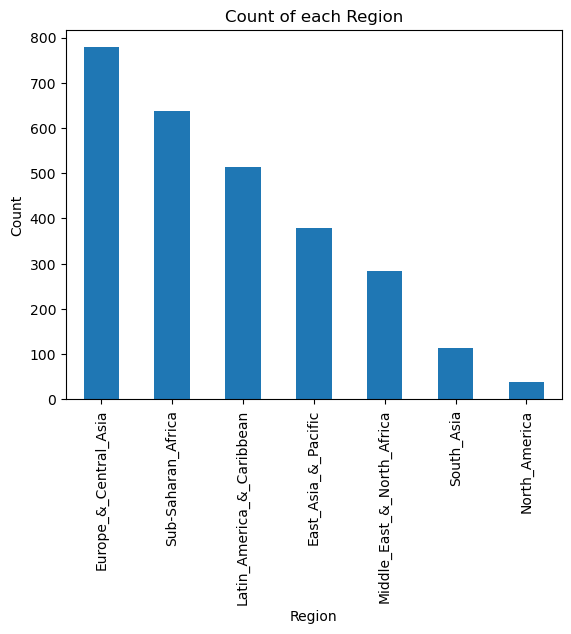

In [307]:
plt.plot()
count.plot(kind="bar")
plt.title("Count of each Region")
plt.ylabel("Count")
plt.xlabel("Region")

In [312]:
df_eda.columns

Index(['country_name', 'region', 'incomegroup', 'year',
       'life_expectancy_world_bank', 'prevelance_of_undernourishment', 'co2',
       'health_expenditure_per', 'education_expenditure_per', 'unemployment',
       'sanitation', 'injuries', 'communicable', 'noncommunicable', 'year_dt'],
      dtype='object')

Text(0.5, 1.0, 'Life Expectancy data for each Regio')

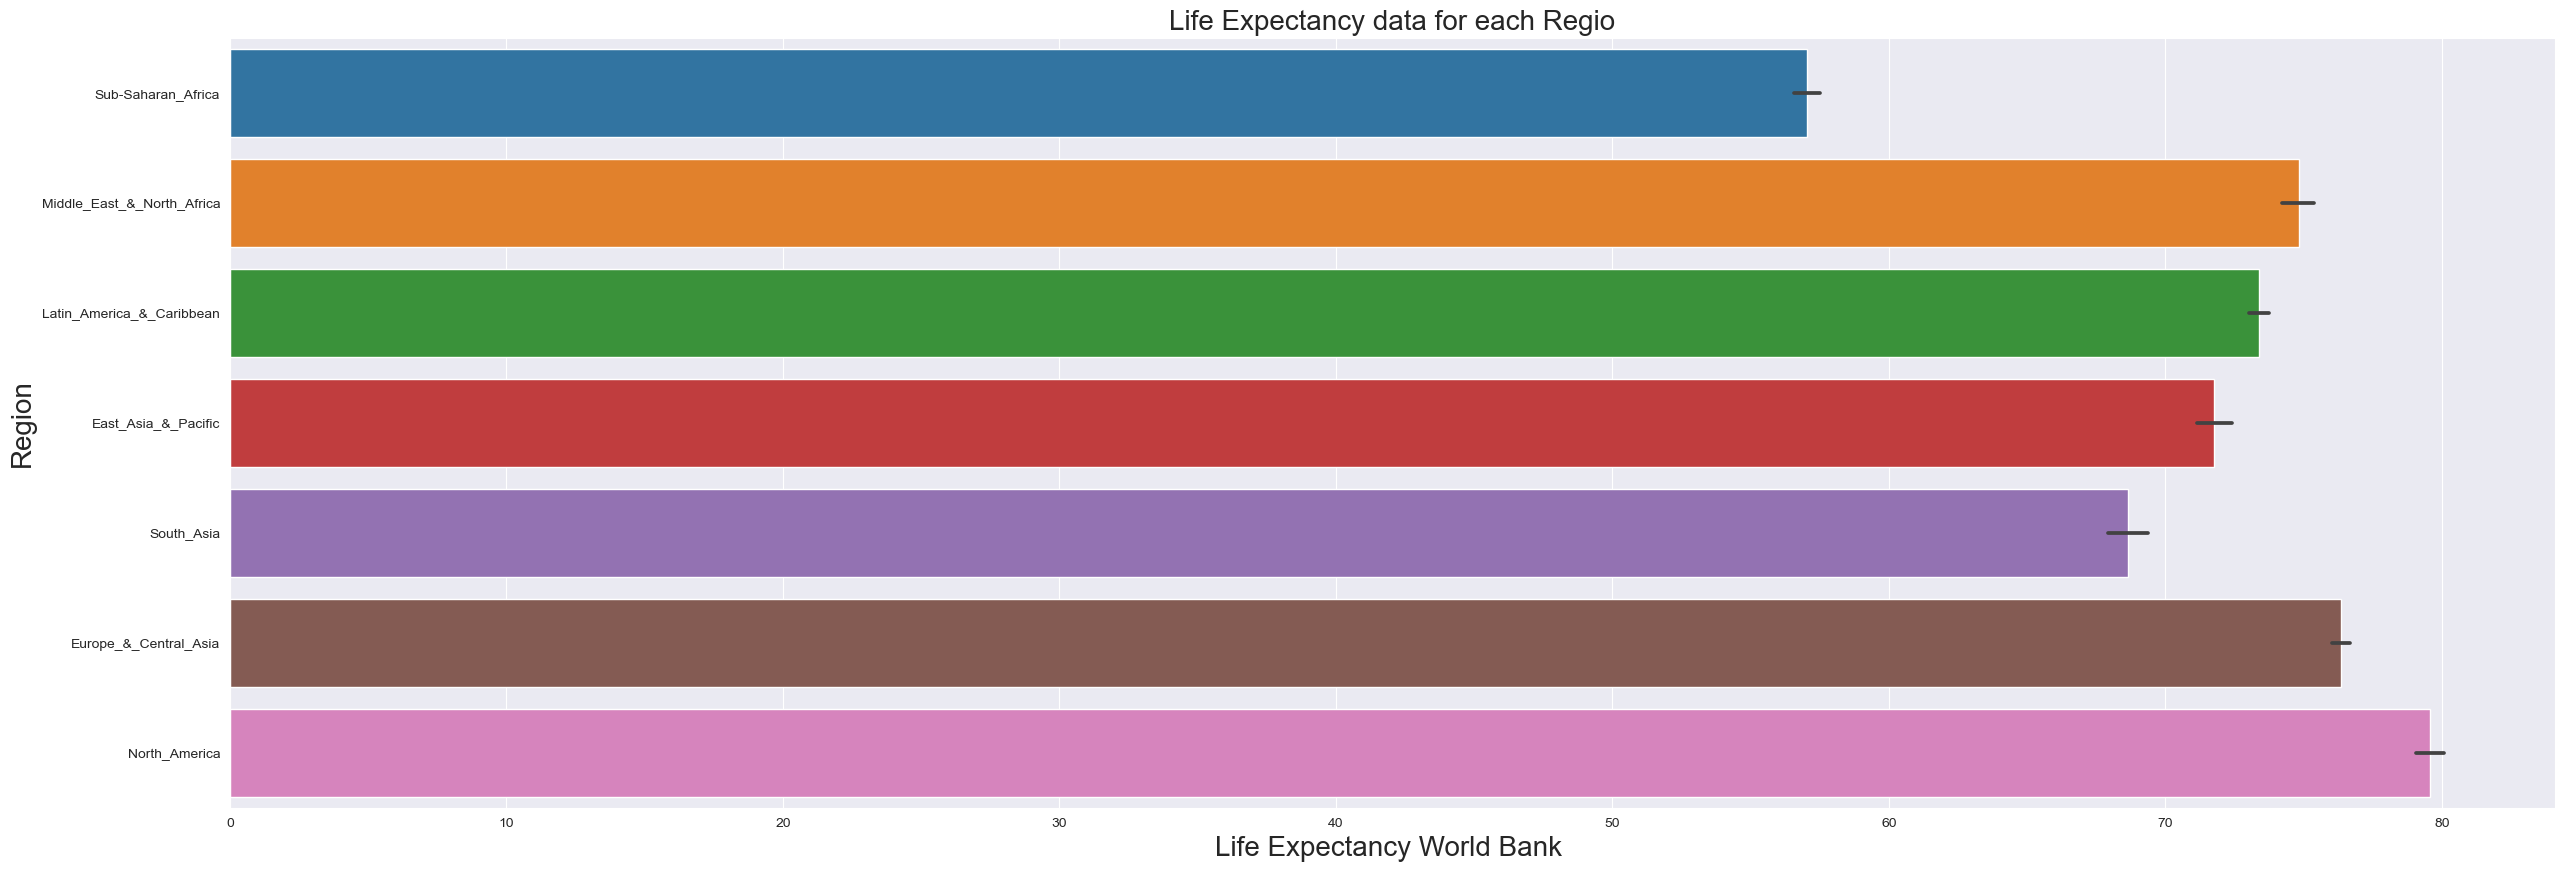

In [365]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,10))
data=df_eda.sort_values(by='life_expectancy_world_bank', ascending=True)
sns.barplot(y='region', x='life_expectancy_world_bank', data=data)
plt.xlabel('Life Expectancy World Bank ', size=20)
plt.ylabel('Region', size=20)
plt.title('Life Expectancy data for each Region',size=20)

Text(0.5, 1.0, 'education_expenditure_per data for each Region')

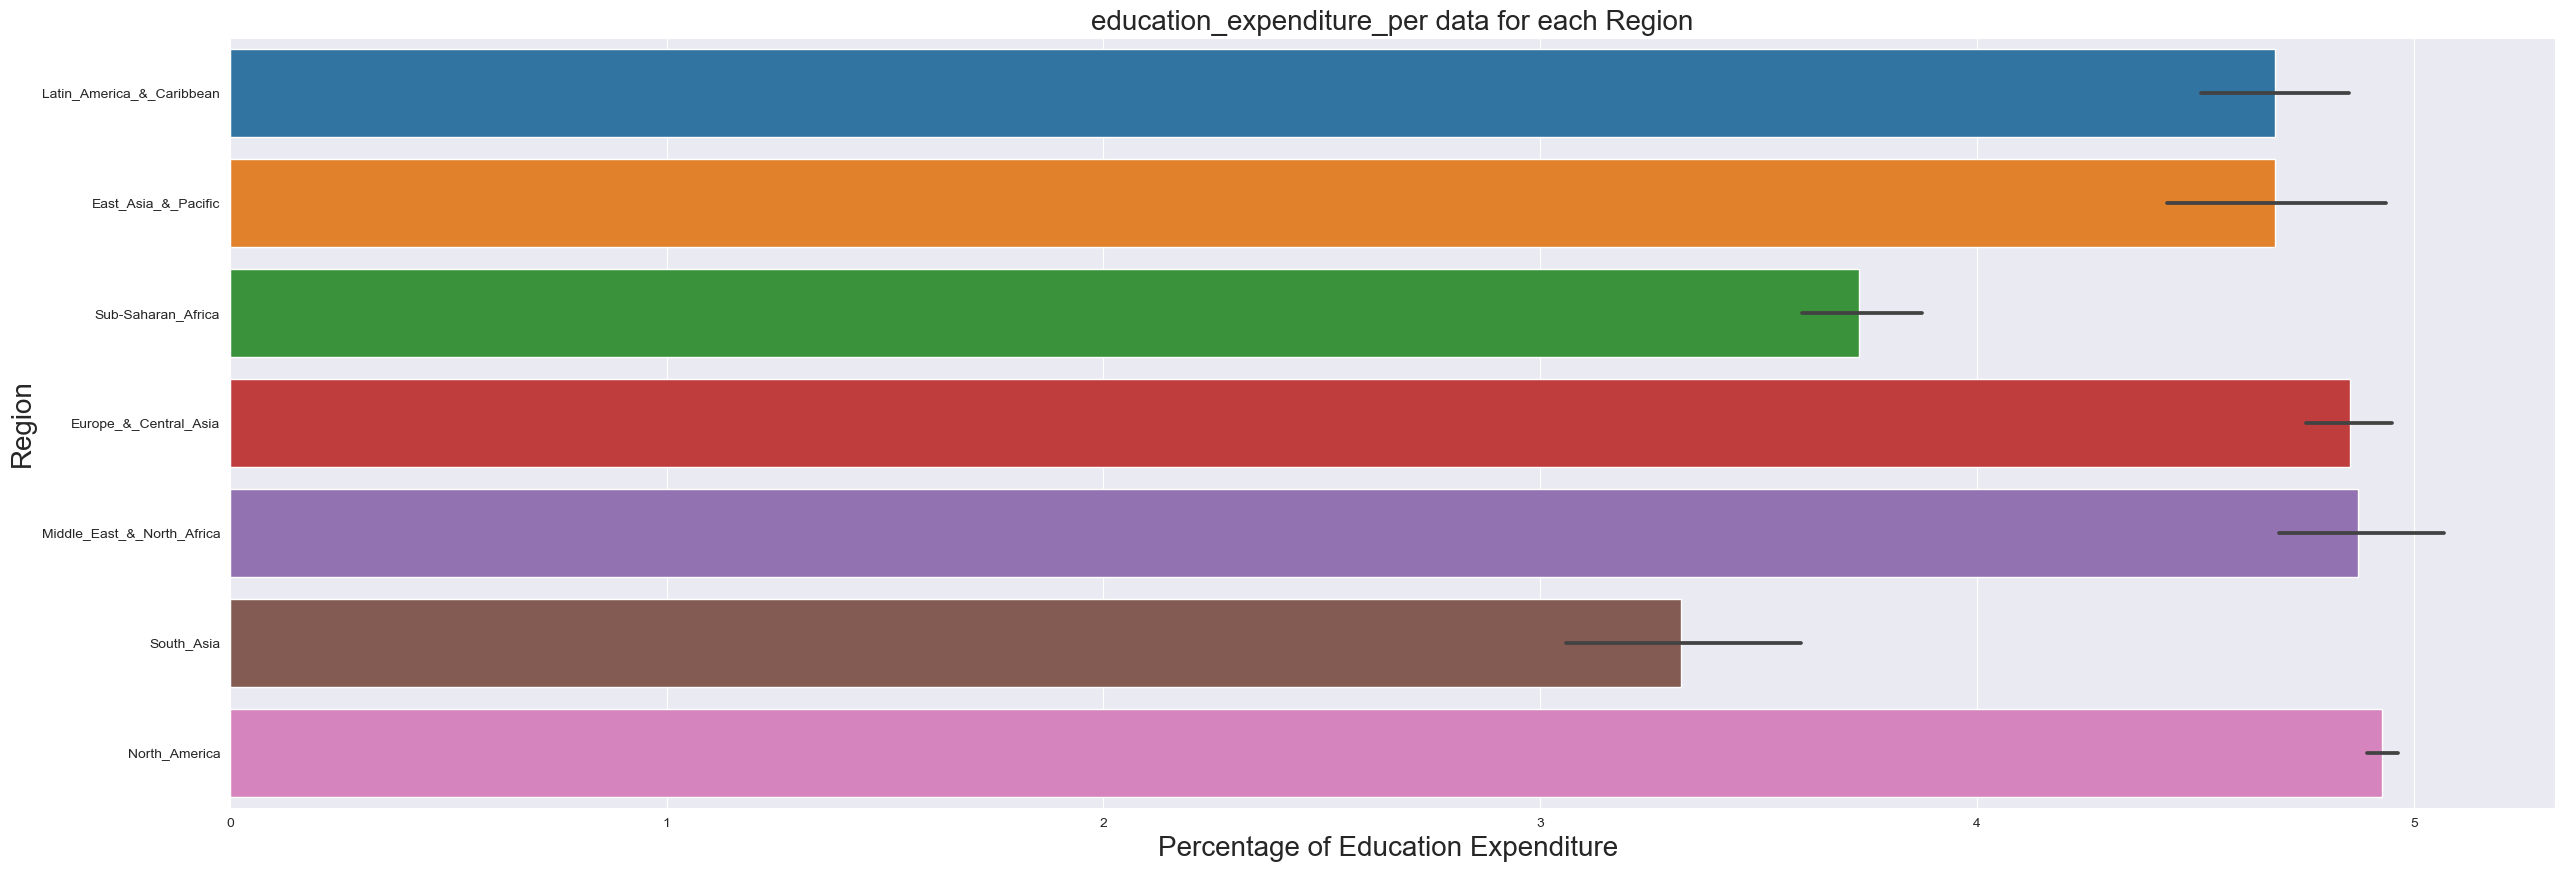

In [366]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,10))
data=df_eda.sort_values(by='education_expenditure_per', ascending=False)
sns.barplot(y='region', x='education_expenditure_per', data=data)
plt.xlabel('Percentage of Education Expenditure ', size=20)
plt.ylabel('Region', size=20)
plt.title('education_expenditure_per data for each Region',size=20)

Text(0.5, 1.0, 'education_expenditure_per data for each country')

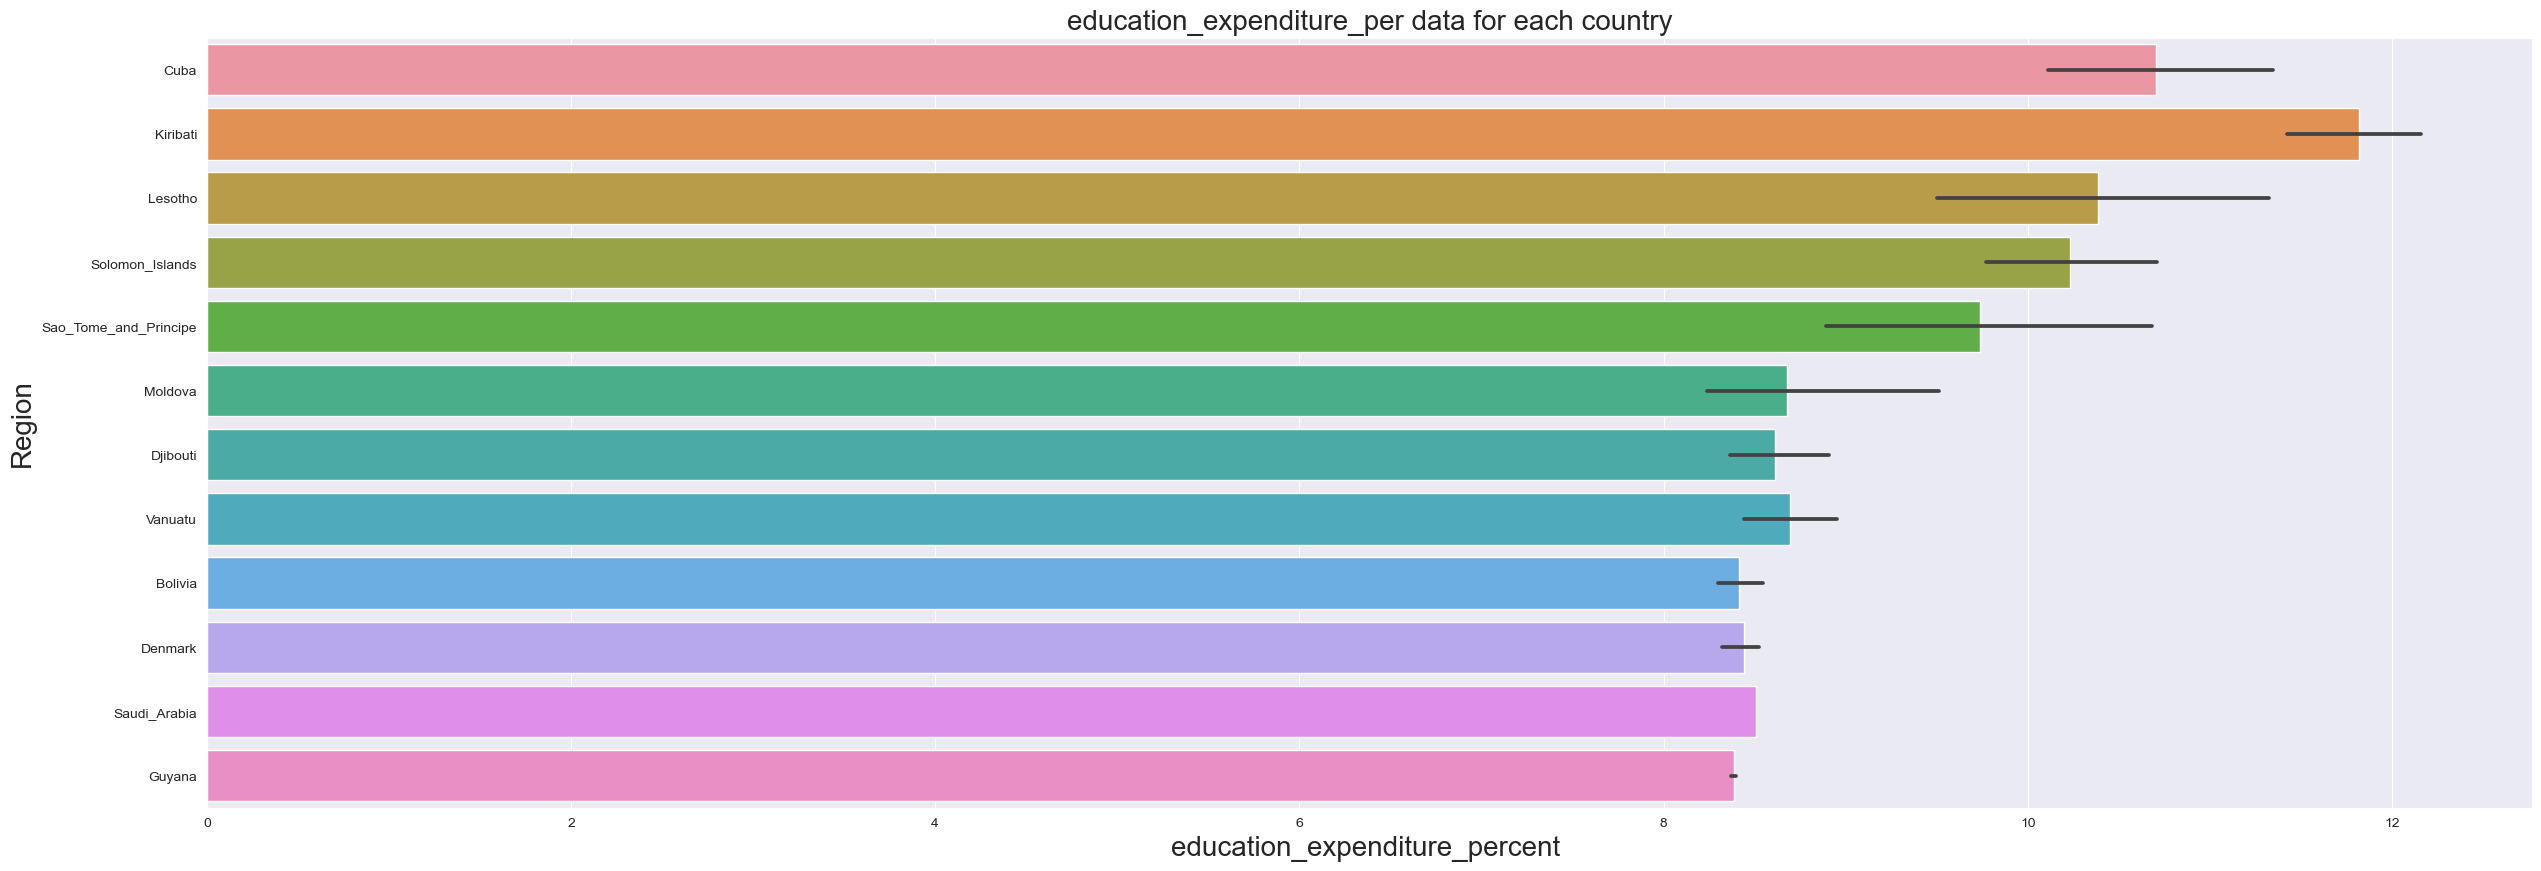

In [362]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,10))
data=df_eda.sort_values(by='education_expenditure_per', ascending=False)
sns.barplot(y='country_name', x='education_expenditure_per', data=data.head(100))
plt.xlabel('education_expenditure_percent ', size=20)
plt.ylabel('Region', size=20)
plt.title('education_expenditure_per data for each country',size=20)



In [363]:
df_eda.to_csv('df_eda.csv',index=False)